In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import imread, imresize
%matplotlib inline

/Users/magarwal/python37/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  import sys


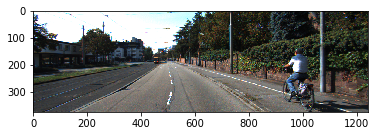

In [2]:
# load test image
image_path = 'data/data_road/training/image_2/um_000000.png'

# load test ground truth
gt_path ='data/data_road/training/gt_image_2/um_road_000000.png'

image = imread(image_path)
plt.imshow(image)

/Users/magarwal/python37/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


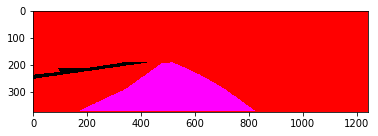

In [3]:
gt_image = imread(gt_path)
plt.imshow(gt_image)


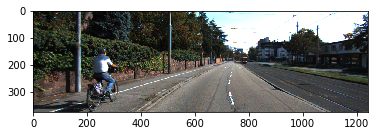

In [4]:
################## Flip augmentation ##################
# flip image: Chooses to flip with probability of 0.5
image_flip = np.fliplr(image)

#show flipped image
plt.imshow(image_flip)

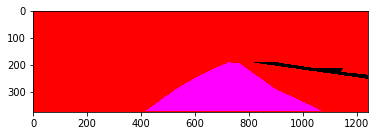

In [5]:
# flip ground truth
gt_flip = np.fliplr(gt_image)

# show flipped ground truth
plt.imshow(gt_flip)


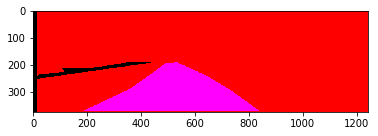

In [6]:
################## Translation augmentation ##################
# Translate horizontally (randomly) between -20 to 20 pixels
import cv2

# translate horizontally (randomly) between -200 to 200 pixels
trans_size = 200
trans = int(np.random.uniform(-trans_size, trans_size, 1))

Trans_M = np.float32([[1,0,trans],[0,1,0]])
rows, cols, chan = image.shape
transformed_img = cv2.warpAffine(gt_image, Trans_M, (cols, rows))

plt.imshow(transformed_img)

In [7]:
# augmentation function
def augment_image(image):
    """Apply augmentation operation to image"""

    rows, cols, _ = image.shape
    # flip image:
    if np.random.random() > 0.5:
        image = np.fliplr(image)

    # apply horizontal translation between -200 to 200 pixels
    trans_size = 200
    trans = int(np.random.uniform(-trans_size, trans_size, 1))

    trans_M = np.float32([[1,0,trans],[0,1,0]])
    image = cv2.warpAffine(image, trans_M, (cols, rows))
    
    if np.random.random() > 0.5:
        image = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
        random_bright = .25+np.random.uniform()
        
        # scaling up or down the V channel of HSV
        image[:,:,2] = image[:,:,2]*random_bright
        image = cv2.cvtColor(image, cv2.COLOR_HSV2RGB)

    return image

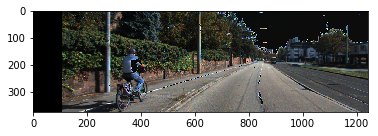

In [8]:
aug_image = augment_image(image)
plt.imshow(aug_image)

In [9]:
# make video clip from result images
import os
output_dir = './data/test_vids/project_video_solve/'
data_sub_dir = 'project_video'
images = [img for img in os.listdir(output_dir) if img.endswith(".png")]

FileNotFoundError: [Errno 2] No such file or directory: './data/test_vids/project_video_solve/'

In [ ]:
frame = cv2.imread(os.path.join(output_dir, images[0]))height, width, layers = frame.shape
video = cv2.VideoWriter('./data/test_vids/'+data_sub_dir+'.mp4', cv2.VideoWriter_fourcc(*"MJPG"), 30, (width,height))
for image in images:
        video.write(cv2.imread(os.path.join(output_dir+'/', image)))

In [ ]:
os.path.join(output_dir, image)